In [210]:
get_ipython().magic('matplotlib inline')
import pandas;
import matplotlib;
import matplotlib.pyplot as plt
import scipy.io;
import numpy as np
from matplotlib.pylab import rcParams
import math
from scipy import signal
from scipy.fftpack import fft, fftshift
import scipy.stats
from rstyle import rstyle

def ggaxes(fig=None):
    if fig is None: fig = plt.figure()
    ax = fig.add_subplot(111)
    rstyle(ax)
    return ax

rcParams['figure.figsize'] = 10, 10
rcParams['figure.dpi'] = 300;
rcParams['lines.linewidth'] = 2.2;
get_ipython().magic('pdb')

Automatic pdb calling has been turned ON


In [279]:
def synthetic_neuron(drive):
    """
    Simulates a mock neuron with a time step of 1ms.
    Arguments:
    drive - input to the neuron (expect zero mean; SD=1)
    Returns:
    rho - response function (0=non-spike and 1=spike at each time step)
    """
    dt = .001
    T = dt*len(drive)
    time = np.arange(0, T, dt)
    lagSteps = .02/dt
    drive = np.concatenate((np.zeros(lagSteps), drive[lagSteps:])) 
    system = scipy.signal.lti([1], [.03**2, 2*.03, 1])
    _, L, _ = scipy.signal.lsim(system, drive[:,np.newaxis], time) 
    rate = np.divide(30, 1 + np.exp(50*(.05-L)))
    spikeProb = rate*dt
    return np.random.rand(len(spikeProb)) < spikeProb

def gaussian(x, mu, var):
    return np.exp(-np.power(x-mu, 2.)/(2*var))

def plot_spike_raster(trial, spikeTimes, ax):
    rep_trials = np.repeat(trial, np.size(spikeTimes))
    sizes = np.ones(len(spikeTimes))*40;
    ax.axhline(y=trial, linewidth=0.3);
    ax.scatter(spikeTimes, np.array([rep_trials]), marker='|', alpha=0.9,
               color='black', s=sizes);

def plot_psth(spikeTimes, num_bins, ax2):
    counts = ax2.hist(spikeTimes, bins = num_bins, histtype='step');
    return counts;

In [3]:
tuning_data = scipy.io.loadmat('MT direction tuning.mat');

In [83]:
sptimes = 1000*tuning_data['spikeTimes'][0];
directions = tuning_data['direction'];

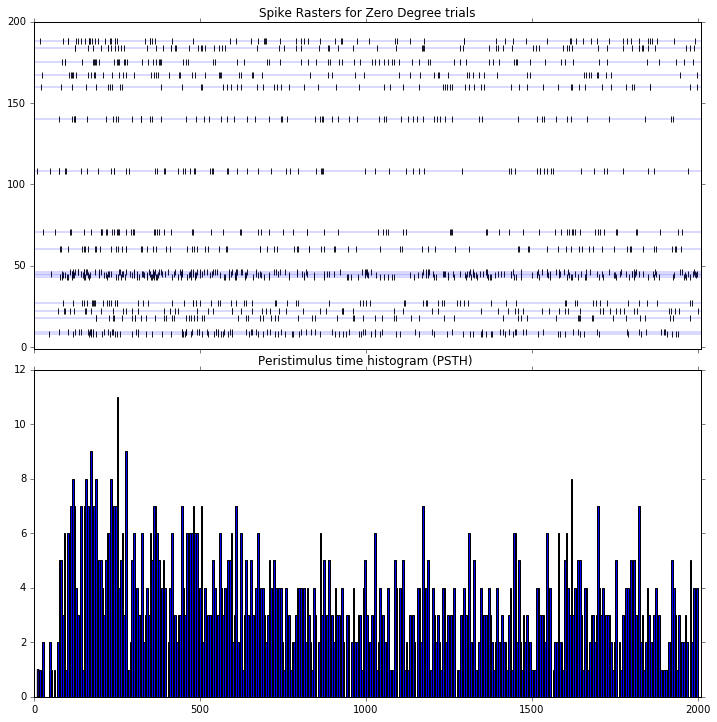

In [282]:
zero_deg_trial_indices = np.where(directions==0)[1];
zer_deg_trial_spike_times = sptimes[zero_deg_trial_indices];
fig, (ax, ax2) = plt.subplots(2, 1, sharex=True)
fig.tight_layout();
# ax.grid('on');

for trial, spikeTimes in zip(zero_deg_trial_indices, zer_deg_trial_spike_times):
    plot_spike_raster(trial, spikeTimes, ax);

ax.set_xlim([-0.05,2010])
ax.set_ylim([-1, 200])
ax.set_title("Spike Rasters for Zero Degree trials")

all_spikes = np.array(zer_deg_trial_spike_times[0])
for i in range(1, len(zer_deg_trial_spike_times)):
    all_spikes = np.concatenate((all_spikes, zer_deg_trial_spike_times[i]), axis=1);
num_bins = 2/0.005;
ax2.hist(all_spikes[0], bins=num_bins)
ax2.set_title('Peristimulus time histogram (PSTH) ')
# ax2.set_xlabel

Use Gaussian window functions to generate single trial rate estimates

In [289]:
std_dev1 = 0.5;
std_dev2 = 0.005;
len_gauss = 3;
window1 = scipy.signal.gaussian(M=len_gauss, std=std_dev1)
window1 /= window1.sum()

window2 = scipy.signal.gaussian(M=len_gauss, std=std_dev2)
window2 /= window2.sum()

num_bins = 20;
trial_nine = zer_deg_trial_spike_times[zero_deg_trial_indices[1]].tolist()[0]

# import pdb; pdb.set_trace();
smoothed = np.convolve(all_spikes[0], window1, 'full');
smoothed2 = np.convolve(all_spikes[0], window2, 'full');

print(scipy.stats.describe(trial_nine).mean, scipy.stats.describe(trial_nine).minmax)
print(scipy.stats.describe(smoothed).mean, scipy.stats.describe(smoothed).minmax)
print(scipy.stats.describe(smoothed2).mean, scipy.stats.describe(smoothed2).minmax)

920.225 (77.0, 1949.0)
907.050900548 (4.6863070724448326, 1991.8934930210808)
907.050900548 (0.0, 2001.0)


(0, 10)

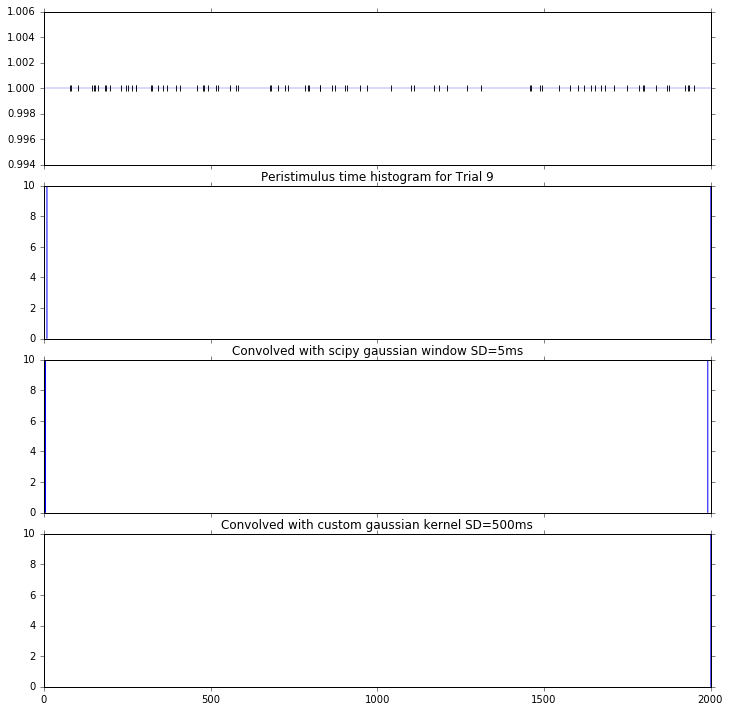

In [292]:
f, (ax2,ax3,ax4,ax5) = plt.subplots(4,1, sharex=True);
f.tight_layout()

plot_spike_raster(1, trial_nine, ax2);
ax2.set_xlim([0,2000])

plot_psth(all_spikes[0], num_bins, ax3);
ax3.set_title('Peristimulus time histogram for Trial 9');
ax3.set_ylim([0,10])
plot_psth(smoothed, num_bins, ax4)
ax4.set_title('Convolved with scipy gaussian window SD=5ms');
ax4.set_ylim([0,10])
plot_psth(smoothed2, num_bins, ax5)
ax5.set_title('Convolved with custom gaussian kernel SD=500ms')
ax5.set_ylim([0,10])

In [156]:
lll = {'x': nine_edges[1:], 'y':nine_hist}
ll = pandas.DataFrame(lll)
?ll.hist()

In [286]:
len(smoothed2)

82